In [4]:
# coding: utf-8
import re

# import h5py
import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt

import const
from datasets import HTSDataset
from train import pad_data
from net import build_net

ModuleNotFoundError: No module named 'numpy'

In [2]:
with open('model/training_report.txt', 'r') as report_file:
    validation_data = \
        [line.strip("\n") for line in report_file.readlines()]

In [3]:
hts_validation_dataset = HTSDataset(
    "/media/tomaszk/DANE/Speech_archive/HTS-demo_AMU_PL_ILO_STRAIGHT",
    file_list=validation_data,
    transform=pad_data, f0_backward_window_len=const.F0_WINDOW_LEN,
    min_f0=const.MIN_F0, max_f0=const.MAX_F0,
    min_duration=const.MIN_DURATION, max_duration=const.MAX_DURATION,
    rich_feats=const.RICH_FEATS)

NameError: name 'HTSDataset' is not defined

In [4]:
results = h5py.File('./results/preds.hdf5', 'r')
results.keys()
filename = 'amu_pl_ilo_BAZA_2006A_zbitki_A0135.lab'
results[filename + '/saliency']

<HDF5 dataset "saliency": shape (1, 1, 1900, 1297), type "<f4">

In [5]:
saliency = results[filename + '/saliency'][0][0].T
saliency

array([[ 1.1105899e-03, -5.3397409e-05,  5.0812738e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.8606623e-04, -3.6496759e-04,  1.7931924e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.4233643e-03, -1.8370708e-03, -2.0048942e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-1.4562182e-03, -2.8054849e-03, -2.6491412e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 8.8536908e-04,  1.0865487e-03,  1.1176720e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.5621358e-02,  4.6759292e-02,  4.7671422e-02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [6]:
QUESTION_FILE_PATH = hts_validation_dataset.question_file_name
with open(QUESTION_FILE_PATH) as qst_file:
    questions = qst_file.readlines()

In [7]:
inputFeatureNames = [
    re.sub("[\t\n]", "", re.sub('\"(.*)\"', "\g<1>", line))
    for line in questions if line.strip()
]
inputFeatureNames.append('vuv')

In [8]:
feature_saliency_ranking = sorted(
    [(saliency[index].mean(), index) for index in range(saliency.shape[0])],
    key=lambda x: x[0], reverse=True)

In [9]:
[(inputFeatureNames[feat[1]], feat[0]) for feat in feature_saliency_ranking]

[('vuv', 0.10863361),
 ('QS Pos_C-Syl_in_C-Phrase(Fw)==14{*&14-*}', 0.016680196),
 ('QS Num-StressedSyl_before_C-Syl_in_C-Phrase==8{*#8-*}', 0.011331115),
 ('QS Pos_C-Syl_in_C-Phrase(Fw)==19{*&19-*}', 0.011323501),
 ('QS Pos_C-Syl_in_C-Phrase(Bw)==20{*-20#*}', 0.011065239),
 ('QS R-Phrase_Num-Syls==7{*/I:7=*}', 0.009364633),
 ('QS Seg_Fw==6{*@6_*}', 0.009237282),
 ('QS Num-StressedSyl_after_C-Syl_in_C-Phrase<=10{*-?$*,*-10$*}', 0.009109546),
 ('QS Num-Syls_in_Utterance<=4{*/J:1+*,*/J:2+*,*/J:3+*,*/J:4+*}', 0.008872682),
 ('QS Pos_C-Syl_in_C-Phrase(Bw)==9{*-9#*}', 0.0087842075),
 ('QS Seg_Fw<=5{*@x_*,*@1_*,*@2_*,*@3_*,*@4_*,*@5_*}', 0.008674288),
 ('QS Pos_C-Syl_in_C-Phrase(Bw)<=11{*-?#*,*-10#*,*-11#*}', 0.008559472),
 ('QS RR-ki{*=ki@*}', 0.008505885),
 ('QS R-Phrase_Num-Syls<=5{*/I:0=*,*/I:1=*,*/I:2=*,*/I:3=*,*/I:4=*,*/I:5=*}',
  0.008468581),
 ('QS Pos_C-Word_in_C-Phrase(Fw)==12{*@12+*}', 0.008452534),
 ('QS Pos_C-Syl_in_C-Word(Bw)==6{*-6&*}', 0.008406764),
 ('QS Pos_C-Syl_in_C-Phras

(0, 1900)

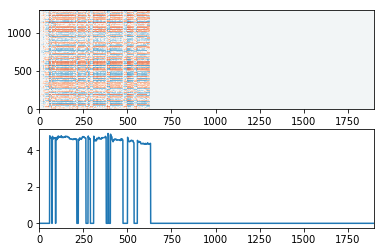

In [10]:
pcm = ax[0].pcolormesh(
    saliency, norm=colors.SymLogNorm(
        linthresh=0.001, linscale=0.001,
        vmin=saliency.min(), vmax=saliency.max()),
    cmap='RdBu_r')
plt.xlim([0, saliency.shape[0]])


In [11]:
plt.savefig(
    filename[:filename.index('.') - 1] + '.png', dpi=600)


<Figure size 432x288 with 0 Axes>

In [12]:
from merlin.io_funcs.binary_io import BinaryIOCollection 

In [13]:
bc = BinaryIOCollection()

In [14]:
original_lf0 = bc.load_binary_file("/media/tomaszk/DANE/workspace/HTS/HTS/HTS-demo_AMU-PL-ILO_DNN/gen/ver1/stc/0/amu_pl_ilo_BAZA_2006A_zbitki_A0249.lf0", 1) 
predicted_lf0 = results[filename + '/preds'][0]
# predicted_lf0[:original_lf0.shape[0],:].shape

In [16]:
bc.array_to_binary_file(predicted_lf0, "/media/tomaszk/DANE/workspace/HTS/HTS/HTS-demo_AMU-PL-ILO_DNN/gen/ver1/stc/0/amu_pl_ilo_BAZA_2006A_zbitki_A0249.lf0.pred")


In [17]:
def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def mse(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Squared Error """
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Root Mean Squared Error """
    return rmse(actual, predicted) / (actual.max() - actual.min())


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))

In [26]:
all((original_lf0 == predicted_lf0).flatten())

True

In [22]:
predicted_lf0[600]

array([4.3489003], dtype=float32)

In [23]:
original_lf0[600]

array([4.3489003], dtype=float32)